# How Did the Introduction of Video-Assistant Referees (VAR) in the English Premier League (2018/2019) Affect Fans’ Enjoyment of Football?

This notebook will curate a collection of tweets containing "#VAR", obtained using twarc in a command-line environment, and perform sentiment analysis on them to determine whether the tweets are mostly positive, negative or neutral.

### Importing Tweet Data Into DataFrame
Tweets were captured using:
twarc search "#VAR" --lang en --limit 15000 > var_tweets.jsonl 
and coverted to csv using:
python twarc/utils/json2csv.py var_tweets.jsonl > var_tweets.csv


In [244]:
#import pandas library
import pandas as pd

#Set DataFrame parameters to view tweet text and all columns:
pd.set_option("max_colwidth", 500)
pd.set_option("display.max_columns",37)

#pd.reset_option("^display")

#Read var_tweets.csv into a dataframe
VarTweets = pd.read_csv('var_tweets.csv')

#display DataFrame
display(VarTweets)

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,urls,favorite_count,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_id,user_created_at,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,1383897941841043464,https://twitter.com/Xeric_Sports/status/1383897941841043464,Sun Apr 18 21:39:15 +0000 2021,2021-04-18 21:39:15+00:00,Xeric_Sports,Great to see that #MLS gets it when it comes to the use of #VAR as a tool to help officiate matches - judicious application instead of being over officious and disruptive to the game. #ClearAndObvious https://t.co/SHsuPMP61f,quote,NaN,MLS VAR ClearAndObvious,NaN,https://twitter.com/worldsoccertalk/status/1383878154247233540,0,NaN,NaN,NaN,en,NaN,False,0,1.383878e+18,worldsoccertalk,9.499692e+06,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",839864506792701952,Thu Mar 09 15:44:37 +0000 2017,False,"Soccer-specialty Agency offering full service player representation, soccer business development & marketing consultation.",13876,333,725,4,USA,XERIC Sports Management,8134,NaN,http://Www.xericsports.com,False
1,1383897776895840263,https://twitter.com/Enoch_Ajekss/status/1383897776895840263,Sun Apr 18 21:38:36 +0000 2021,2021-04-18 21:38:36+00:00,Enoch_Ajekss,"How have professional officials looked at that and deemed it to be a penalty. Fuck VAR, Fuck the premier league and fuck football. #Var #Arsenal #ARSFUL https://t.co/ysScc0yKc9",retweet,NaN,Var Arsenal ARSFUL,NaN,NaN,98,NaN,NaN,NaN,en,NaN,NaN,30,1.383785e+18,Alex_markham12,4.865213e+09,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",2214028349,Sun Dec 08 14:20:45 +0000 2013,False,Fashion Designer || Computer And Communication Engineer || Northern Yoruba Boy || Football Lover ❤️ || Die Hard @Arsenal Fan COYG!⚽⚽ || ATBU Alumnus,7142,1494,1999,0,NaN,ÓmÓ ÍyÁ OloÚŃje,2619,NaN,NaN,False
2,1383896405081612289,https://twitter.com/OakleyBromfield/status/1383896405081612289,Sun Apr 18 21:33:09 +0000 2021,2021-04-18 21:33:09+00:00,OakleyBromfield,Someone tell me how this is a penalty... please. \r\n#ARSFUL #Arsenal #Fulham #FulhamPenalty #VAR #EuropeanSuperLeague @AFTVMedia @MrDtAFC @TroopzAFC @leemarkjudges @MGH https://t.co/GNQUqBMwQO,retweet,NaN,ARSFUL Arsenal Fulham FulhamPenalty VAR EuropeanSuperLeague,NaN,NaN,1,NaN,NaN,NaN,en,NaN,NaN,1,1.383895e+18,_OakleySports,1.143199e+18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",604615611,Sun Jun 10 13:51:56 +0000 2012,False,Essex @_OakleySports - Portfolio Account,27005,119,262,1,Essex,Oakley🤴🏼,3419,NaN,https://oakleybromfield.wixsite.com/simplysports,False
3,1383895849697116160,https://twitter.com/KrisMillsKJK/status/1383895849697116160,Sun Apr 18 21:30:56 +0000 2021,2021-04-18 21:30:56+00:00,KrisMillsKJK,First we got #VAR and now this bullshit #SuperLeague football is dead!,original,NaN,VAR SuperLeague,NaN,NaN,0,NaN,NaN,NaN,en,NaN,NaN,0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1111550869,Tue Jan 22 13:26:35 +0000 2013,False,"Proud Dad to my kids Kaitlyn, Jesse, Karter and Jersey. My missus is alreet I suppose! #LFC",4563,209,140,5,NaN,Kris Mills,12148,NaN,NaN,False
4,1383895357290029058,https://twitter.com/MoutinhosWave/status/1383895357290029058,Sun Apr 18 21:28:59 +0000 2021,2021-04-18 21:28:59+00:00,MoutinhosWave,WORST DECISION??? #football #uefa #superleague #var #GREED,retweet,NaN,football uefa superleague var GREED,NaN,NaN,2,NaN,NaN,NaN,en,NaN,NaN,2,1.383884e+18,MoutinhosWave,7.747445e+07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for i

Isolate more relevant columns in the DataFrame

In [245]:
#Selecting columns we want to display
VarTweets[['created_at', 'tweet_type', 'text', 'retweet_count', 'favorite_count', 'user_name', 'user_location', 'hashtags', ]]

,created_at,tweet_type,text,retweet_count,favorite_count,user_name,user_location,hashtags
0,Sun Apr 18 21:39:15 +0000 2021,quote,Great to see that #MLS gets it when it comes to the use of #VAR as a tool to help officiate matches - judicious application instead of being over officious and disruptive to the game. #ClearAndObvious https://t.co/SHsuPMP61f,0,0,XERIC Sports Management,USA,MLS VAR ClearAndObvious
1,Sun Apr 18 21:38:36 +0000 2021,retweet,"How have professional officials looked at that and deemed it to be a penalty. Fuck VAR, Fuck the premier league and fuck football. #Var #Arsenal #ARSFUL https://t.co/ysScc0yKc9",30,98,ÓmÓ ÍyÁ OloÚŃje,NaN,Var Arsenal ARSFUL
2,Sun Apr 18 21:33:09 +0000 2021,retweet,Someone tell me how this is a penalty... please. \r\n#ARSFUL #Arsenal #Fulham #FulhamPenalty #VAR #EuropeanSuperLeague @AFTVMedia @MrDtAFC @TroopzAFC @leemarkjudges @MGH https://t.co/GNQUqBMwQO,1,1,Oakley🤴🏼,Essex,ARSFUL Arsenal Fulham FulhamPenalty VAR EuropeanSuperLeague
3,Sun Apr 18 21:30:56 +0000 2021,original,First we got #VAR and now this bullshit #SuperLeague football is dead!,0,0,Kris Mills,NaN,VAR SuperLeague
4,Sun Apr 18 21:28:59 +0000 2021,retweet,WORST DECISION??? #football #uefa #superleague #var #GREED,2,2,Jack Gill /\_/\ 🇲🇦,Wolverhampton /\_/\,football uefa superleague var GREED
...,...,...,...,...,...,...,...,...
9026,Sat Apr 10 17:31:04 +0000 2021,retweet,"#PremierLeague football slowly morphing into American football. Broken fingernail? Stop! VAR? Stop! Get it wrong after a week of checking it? The game has been hijacked by TV &amp; fools. They keep down this road, be a lot of people looking for a different game Saturday #VAR #LIVAVL",44,351,RaddyLad,NaN,PremierLeague VAR LIVAVL
9027,Sat Apr 10 17:28:27 +0000 2021,quote,Scrap this bullshit already #VAR https://t.co/SnwB0tNYBE,0,0,D🅰️niel,"Miami, FL 🌴 🏖 ☀️",VAR
9028,Sat Apr 10 17:28:13 +0000 2021,original,"You can have wrong decisions sometimes, or you can have VAR. what do you want? #var #football",0,1,Ross,"Holywood, Northern Ireland",var football
9029,Sat Apr 10 17:27:52 +0000 2021,retweet,Who didn't celebrate that goal until Villa had kicked off afterwards? The VAR effect.\r\n\r\n#LFC #LIVAVL #VAR @MoSalah https://t.co/Uyzxc4rtMw,10,97,Kraiwut K.,NaN,LFC LIVAVL VAR


### Data Curation

Only the tweet text is needed for sentiment analysis so we will store those in a list.

In [246]:
#create a Series object that stores the text and store each item in a list
VarTweets_textS=VarTweets['text']

#list to store each tweet text
VarTweets_list = []

#store each tweet in the list
for item in VarTweets_textS:
        VarTweets_list.append(item)

#uncomment to check data cleaning
#VarTweets_list[110:120]

#len(VarTweets_list)

#### Data Cleaning
We want strings of tweet text as close to original as possible with links and irrelevant characters such as '@', '\n','\r' removed. Sentiment analysis works best with the original text and VADER, the sentiment analysis tool, can analyse emojis, slang and hashtags.

In [247]:
#regex expressions
import re

#html encoding
import html

#list of cleaned tweets
VarTweets_list_cleaned = []


for tweet in VarTweets_list:
    
    #remove mentions (@user) because they aren't relevant to the sentiment of the tweet
    clean_tweet=(re.sub(r'@[A-Za-z0-9#_]+','',tweet))
    
    #remove newline characters
    clean_tweet=(re.sub("[\n\r]",' ',clean_tweet))
    
    #removing links
    clean_tweet=(re.sub(r'https?://[^ ]+','',clean_tweet))
    
    #removing special unicode characters
    clean_tweet=(re.sub(u"\u200d♂️", "",clean_tweet))
    
    #decoding html
    clean_tweet=html.unescape(clean_tweet)
    
    #append to new list of cleaned tweets
    VarTweets_list_cleaned.append(clean_tweet)
    

#uncomment to check data cleaning
#VarTweets_list_cleaned[110:120]
#len(VarTweets_list_cleaned)

### Sentiment Analysis
We will perform sentiment analysis on the cleaned tweets using NLTK's pretrained sentiment analyzer called VADER (Valence Aware Dictionary and Sentiment Reasoner).

In [248]:
#import nltk library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

#create an instance of the sentiment intesnity analyser
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\avato\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The compound score ranges from -1 to +1, most negative and positive sentiment score respectively. We will store the compound score of each unique tweet in a dictionary.

Finding the average compound score of the tweetset and percentage of tweets that have a positive, negative, or neutral sentiment can provide an idea of the general sentiment regarding VAR among fans .

In [249]:
#empty dictionary to store tweets and respective compound scores
Tweet_CompoundScores={}

#populate dictionary
for tweet in VarTweets_list_cleaned:
    Tweet_CompoundScores[tweet]=sia.polarity_scores(tweet)['compound']

In [250]:
#calculate average compound score of tweet set
sum=0
for key in Tweet_CompoundScores:
    sum=sum+Tweet_CompoundScores[key]


print(f"Average compound score= {sum/len(Tweet_CompoundScores):.4f}")

Average compound score= -0.1025


In [251]:
#percentage of tweets with positive, neutral and negative compound scores

#positive percentage
counter=0
for key in Tweet_CompoundScores:
    #if compound score indicates a positive tweet
    if(Tweet_CompoundScores[key]>=0.05):
        counter=counter+1

#calculate positive percentage and store in variable 
pos_per=counter/len(Tweet_CompoundScores)
print(f"Percentage of positive tweets = {pos_per:.2%}")

#neutral percentage
counter=0
for key in Tweet_CompoundScores:
    #if compound score indicates a neutral tweet
    if(Tweet_CompoundScores[key] > -0.05 and Tweet_CompoundScores[key] < 0.05):
        counter=counter+1
        
#calculate neutral percentage and store in variable
neu_per=counter/len(Tweet_CompoundScores)
print(f"Percentage of neutral tweets = {neu_per:.2%}")

#negative percentage
counter=0
for key in Tweet_CompoundScores:
    #if compound score indicates a negative tweet
    if(Tweet_CompoundScores[key]<= -0.05):
        counter = counter+1
        
#calculate negative percentage and store in variable
neg_per=counter/len(Tweet_CompoundScores)
print(f"Percentage of negative tweets = {neg_per:.2%}")

Percentage of positive tweets = 31.18%
Percentage of neutral tweets = 21.98%
Percentage of negative tweets = 46.84%


### Data Visualization
Displaying percentages in a pie chart

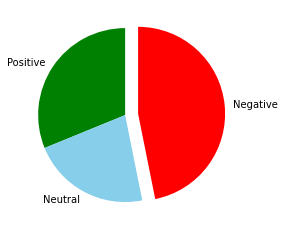

In [252]:
import matplotlib.pyplot as plt
import numpy as np

percentages = np.array([pos_per,neu_per,neg_per])

#formatting pie chart
tweet_labels = ["Positive", "Neutral","Negative"]
style_explode = [0, 0, 0.15]
style_colors = ['green','skyblue','red']

#creating and displaying pie chart
plt.pie(percentages,labels=tweet_labels,startangle = 90,explode=style_explode,colors=style_colors)

plt.show() 

As shown above, the dataset consists of mostly negative tweets